## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.contrib.slim as slim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from parseData import Cifar
import cifar_model
from cifar_model import buildFCmodel,trainModel

from util import plotTrainTest

## Prepare dataset handle

In [2]:
from parseData import Cifar
dataPath = '/home/adityav/UCSD/Spring17/COGS260_ImageRecognition/HW3/data/cifarData/'
cifar = Cifar(dataPath,batchSize = 128, splitRatio = 0.2)

('Number of train examples: ', 40000)
('Number of test examples: ', 10000)


## Config

In [3]:
performBN                  =   True # performBN(batch normalization) : True to perform Batch normalization else False

optimizerDict = {}
optimizerDict['type']      =  'AdaGrad'  #  'SGD','Nesterov','RMSprop', AdaGrad
optimizerDict['lr']        =   0.01 
optimizerDict['momentum']  =   0.5   # no relevance for SGD/AdaGrad`
optimizerDict['dynamic']   =   False

keep_prob                  =   1

## Build FC Model

In [4]:
tf.reset_default_graph() 
fcModelParam = buildFCmodel(optimizerDict,performBN = performBN)
#fcModelParam->dictionary
#keys: x,y_true,y_pred,keep_prob,loss,train_step,accuracy


sess = tf.Session()
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter("./graphs",sess.graph)
writer.close()

train_loss_hist = []
train_accuracy_hist = []
test_loss_hist = []
test_accuracy_hist = []

('Total number of trainable parameters: ', 197738)
Time to build the network 0.87s


Training Network
Step 0, 	 Accuracy: 0.09 , 	 Train Loss: 2.44, 	 Test Loss: 2.47 
Step 50, 	 Accuracy: 0.23 , 	 Train Loss: 2.07, 	 Test Loss: 2.13 
Step 100, 	 Accuracy: 0.27 , 	 Train Loss: 2.07, 	 Test Loss: 2.05 
Step 150, 	 Accuracy: 0.22 , 	 Train Loss: 2.04, 	 Test Loss: 1.92 
Step 200, 	 Accuracy: 0.34 , 	 Train Loss: 1.81, 	 Test Loss: 1.93 
Step 250, 	 Accuracy: 0.40 , 	 Train Loss: 1.79, 	 Test Loss: 1.84 
Step 300, 	 Accuracy: 0.34 , 	 Train Loss: 1.76, 	 Test Loss: 1.87 
Step 350, 	 Accuracy: 0.34 , 	 Train Loss: 1.76, 	 Test Loss: 1.78 
Step 400, 	 Accuracy: 0.41 , 	 Train Loss: 1.72, 	 Test Loss: 1.70 
Step 450, 	 Accuracy: 0.33 , 	 Train Loss: 1.79, 	 Test Loss: 1.58 
Step 500, 	 Accuracy: 0.34 , 	 Train Loss: 1.53, 	 Test Loss: 1.67 
Step 550, 	 Accuracy: 0.40 , 	 Train Loss: 1.60, 	 Test Loss: 1.76 
Step 600, 	 Accuracy: 0.44 , 	 Train Loss: 1.69, 	 Test Loss: 1.56 
Step 650, 	 Accuracy: 0.45 , 	 Train Loss: 1.53, 	 Test Loss: 1.60 
Step 700, 	 Accuracy: 0.42 , 	 Tra

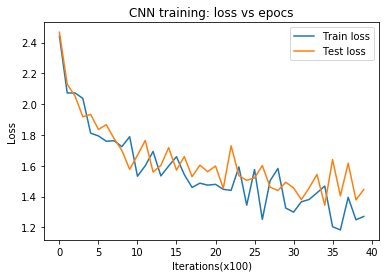

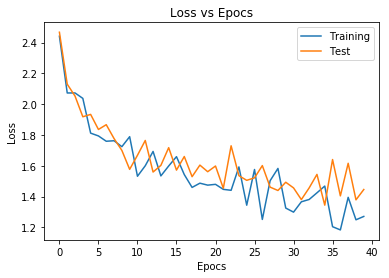

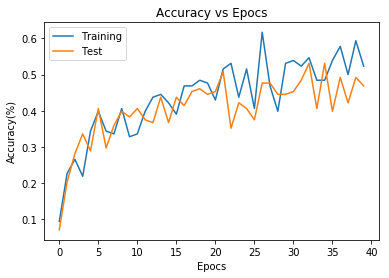

In [5]:
nIter = 2000
with sess.as_default():
    [train_loss,train_acc,test_loss,test_acc] = trainModel(sess,fcModelParam,cifar,keep_prob = keep_prob, nIter = nIter, batchSize = 128)
    
    train_loss_hist        =        train_loss_hist + train_loss
    train_accuracy_hist    =        train_accuracy_hist + train_acc
    test_loss_hist         =        test_loss_hist + test_loss
    test_accuracy_hist     =        test_accuracy_hist + test_acc
    
plotTrainTest(train_loss_hist,test_loss_hist,"Loss vs Epocs","Epocs","Loss")
plotTrainTest(train_accuracy_hist,test_accuracy_hist,"Accuracy vs Epocs","Epocs","Accuracy(%)")

In [6]:
sess.close()